## Playgrounds by Neighborhood

### By Morgan Noonan
#### Dataset: [City of Pittsburgh Playgrounds](https://data.wprdc.org/dataset/playgrounds)

Loading in the neighborhood data with geopandas.

In [6]:
import geopandas 
%matplotlib inline
import pandas as pd
from shapely.geometry import Point

neighborhoods_data = geopandas.read_file("Neighborhoods_.shp") # read shapefile
neighborhoods_data.head(3)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."


Loading in the playground data with geopandas.

In [8]:
# Load playgrounds
playgrounds = geopandas.read_file('playgrounds1.csv')
playgrounds.head(3)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,geometry
0,731501774,Able Long Playground,,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.40836491,-80.02844525,None
1,1461276747,Albert Graham Playground,,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.44051933,-79.98413678,None
2,1860709784,Alpine Playground,,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.45770684,-80.01295165,None


Filtering data to just the neighborhood, a playground counter, and its geometry.

In [9]:
neighborhoods = pd.DataFrame(columns = ["Neighborhood", "playgrounds", "Geometry"])
neighborhoods["Neighborhood"] = neighborhoods_data["hood"]
neighborhoods["playgrounds"] = 0
neighborhoods["Geometry"] = neighborhoods_data["geometry"]

neighborhoods.head(3)

,Neighborhood,playgrounds,Geometry
0,Central Oakland,0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."


Adding to the number of playgrounds per neighborhood.

In [10]:
from shapely.geometry import Point

for i, play in playgrounds.iterrows():
    # point by latitude and longitude, check if in neighborhood geometry
    pt = Point(float(play["longitude"]), float(play["latitude"]))
    for j, neighborhood in neighborhoods.iterrows():
        if neighborhood["Geometry"].contains(pt):
            neighborhoods.at[j, 'playgrounds'] = neighborhood["playgrounds"] + 1
            
            break

neighborhoods.head(5)

,Neighborhood,playgrounds,Geometry
0,Central Oakland,1,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


Showing first 10 neighborhoods with highest playground count in descedning order.

In [11]:
neighborhoods_sorted = neighborhoods.sort_values("playgrounds", ascending=False)

neighborhoods_sorted.head(10)

,Neighborhood,playgrounds,Geometry
24,Squirrel Hill South,8,"POLYGON ((-79.94475 40.44101, -79.94405 40.440..."
15,South Side Slopes,5,"POLYGON ((-79.99713 40.42920, -79.99547 40.428..."
40,Beechview,5,"POLYGON ((-80.02121 40.42342, -80.02111 40.423..."
58,Allegheny Center,4,"POLYGON ((-80.00149 40.45270, -80.00146 40.452..."
36,Highland Park,4,"POLYGON ((-79.91356 40.48644, -79.91354 40.486..."
52,Sheraden,4,"POLYGON ((-80.05705 40.46059, -80.05698 40.460..."
11,Beltzhoover,4,"POLYGON ((-79.99887 40.42174, -79.99853 40.421..."
39,Upper Lawrenceville,3,"POLYGON ((-79.93866 40.48790, -79.93917 40.487..."
32,Carrick,3,"POLYGON ((-79.99194 40.40719, -79.99191 40.407..."
22,Mount Washington,3,"POLYGON ((-80.00386 40.43102, -80.00357 40.430..."


Showing first ten sorted in descending order on bar graph.

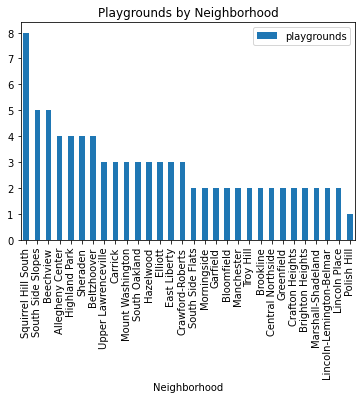

In [12]:
plt = neighborhoods_sorted.iloc[:30].plot(kind='bar', x="Neighborhood", y="playgrounds", title="Playgrounds by Neighborhood")


Showing last 30 in ascending order.

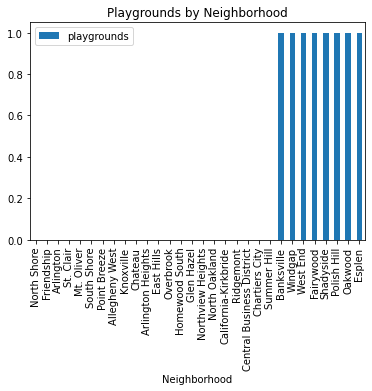

In [13]:
neighborhoods_asc = neighborhoods.sort_values("playgrounds")
plt2 = neighborhoods_asc.iloc[:30].plot(kind='bar', x="Neighborhood", y="playgrounds", title="Playgrounds by Neighborhood")

Showing data on map of pittsburgh colored by neighborhood with most neighborhoods (yellow), to least (dark purple).

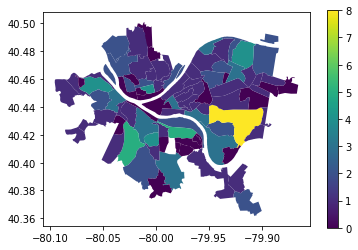

In [14]:
neighborhoods_data["playgrounds"] = neighborhoods["playgrounds"]

neighborhoods_data.plot(column="playgrounds", legend=True)

End of analysis of playgrounds per neighborhood.